In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving assignment5_training_data_metadata (1).csv to assignment5_training_data_metadata (1).csv


In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm
from PIL import Image
D = pd.read_csv('assignment5_training_data_metadata (1).csv').drop(columns=['id'])
D

In [ ]:
from tqdm.notebook import trange, tqdm
from PIL import Image
theList = []
path = "/content/drive/MyDrive/images_folder/train/"
filename = D['image_name'][0]
img = Image.open(path+filename)
im = img.convert("L").resize((250,250))
ds = np.array(im)
ds = ds.reshape(1,ds.shape[0],ds.shape[1])

for i in tqdm(range(1,5286)):
  filename = D['image_name'][i]
  img = Image.open(path+filename)
  im = img.convert("L").resize((250,250))
  i = np.array(im)
  i = i.reshape(1,i.shape[0],i.shape[1])
  ds = np.append(ds,i,axis=0)


In [ ]:
ds.shape

(5286, 250, 250)

In [ ]:
sd = ds/255.0
train_data = np.expand_dims(sd, -1)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers 
import random
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import regularizers


In [ ]:
D = pd.read_csv('assignment5_training_data_metadata (1).csv').drop(columns=['id'])

D[pd.isnull(D)]  = 'NaN'
labels = pd.get_dummies(D['type'])

nan = labels['NaN'].to_numpy()
v = labels['Virus'].to_numpy()
b = labels['bacteria'].to_numpy()
s = labels['Stress-Smoking'].to_numpy()

nan = nan.reshape((5286, 1))
v = v.reshape((5286, 1))
b = b.reshape((5286, 1))
s = s.reshape((5286, 1))

train_labels = np.hstack((nan,v,b,s))

In [ ]:
#data was standardized to be within 0 and 1
# as well as normalization in the network for better performace and stability 
# This was acheived by divied the images by 255 to standardize the color values


In [ ]:
'''
outliers were ignored becuase its not logical to remove certain data from images its self comaed to intance of data on a column
images as one peace of data comes 2 deminsional and not 1

'''


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(250,250,1)),
        layers.Conv2D(24, kernel_size=(3, 3), activation="relu",strides=(2, 2)),
        #layers.Conv2D(24, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)),
        layers.BatchNormalization(),
     
        #layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
        #layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'),
     
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,strides=(2, 2)),
        layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)),
        
        layers.BatchNormalization(),
     
        layers.Conv2D(84, kernel_size=(3, 3), activation="relu",strides=(2, 2)),
        #layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        #layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)),
     
     
        layers.BatchNormalization(),
     
        layers.Flatten(),
        layers.Dense(756, activation='relu'),
        #layers.BatchNormalization(),
        layers.Dense(200, activation='relu'),
        #layers.BatchNormalization(),
       # layers.Dense(1022, activation='relu'),
        layers.Dense(4, activation='softmax')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 24)      240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 24)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 24)        96        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        13888     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 84)          4

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.00001)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
aug = ImageDataGenerator(validation_split=0.2,rotation_range=20, zoom_range=0.2,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
	horizontal_flip=True,vertical_flip=True,fill_mode="nearest")
# train the network
H = model.fit_generator(aug.flow(train_data, train_labels, batch_size=10),
	validation_data=None, shuffle=True,epochs=20)
#100 epochs for the kaggle submission

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
529/529 [==============================] - 23s 42ms/step - loss: 1.0605 - accuracy: 0.4944
Epoch 2/20
529/529 [==============================] - 22s 42ms/step - loss: 0.8579 - accuracy: 0.6028
Epoch 3/20
529/529 [==============================] - 22s 42ms/step - loss: 0.7794 - accuracy: 0.6420
Epoch 4/20
529/529 [==============================] - 22s 42ms/step - loss: 0.7527 - accuracy: 0.6645
Epoch 5/20
529/529 [==============================] - 22s 41ms/step - loss: 0.7584 - accuracy: 0.6452
Epoch 6/20
529/529 [==============================] - 22s 41ms/step - loss: 0.7371 - accuracy: 0.6628
Epoch 7/20
529/529 [==============================] - 22s 42ms/step - loss: 0.7023 - accuracy: 0.6891
Epoch 8/20
529/529 [==============================] - 22s 41ms/step - loss: 0.6954 - accuracy: 0.6811
Epoch 9/20
529/529 [==============================] - 22s 42ms/step - loss: 0.7005 - accuracy: 0.6885
Epoch 10/20
529/529 [==============================] - 22s 42ms/step - loss: 0.670

Test loss: 0.5912811756134033
Test accuracy: 0.7402572631835938


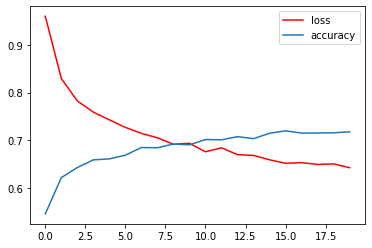

In [ ]:
import imageio
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

score = model.evaluate(train_data, train_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

import pandas as pd

hist_df = pd.DataFrame(H.history)
a = hist_df.iloc[:, 0].to_numpy()
b = hist_df.iloc[:, 1].to_numpy()


plt.plot(a, c='red',label='loss')
plt.plot(b,label='accuracy')
plt.legend()

In [ ]:
hist_df

,loss,accuracy
0,0.960676,0.544835
1,0.829708,0.621075
2,0.782456,0.642452
3,0.758962,0.658532
4,0.742751,0.660613
5,0.726806,0.668369
6,0.714335,0.684449
7,0.704979,0.684071
8,0.691315,0.691827
9,0.693425,0.690125


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving assignment5_test_data_metadata.csv to assignment5_test_data_metadata.csv


In [ ]:
T = pd.read_csv('assignment5_test_data_metadata.csv')
T

,id,image_name
0,5309,IM-0021-0001.jpeg
1,5310,IM-0019-0001.jpeg
2,5311,IM-0017-0001.jpeg
3,5312,IM-0016-0001.jpeg
4,5313,IM-0015-0001.jpeg
...,...,...
619,5928,person1637_virus_2834.jpeg
620,5929,person1635_virus_2831.jpeg
621,5930,person1634_virus_2830.jpeg
622,5931,person1633_virus_2829.jpeg


In [ ]:
path = "/content/drive/MyDrive/images_folder/test/"
filename = T['image_name'][0]
img = Image.open(path+filename)
im = img.convert("L").resize((250,250))
ts = np.array(im)
ts = ts.reshape(1,ts.shape[0],ts.shape[1])

for i in tqdm(range(1,624)):
  filename = T['image_name'][i]
  img = Image.open(path+filename)
  im = img.convert("L").resize((250,250))
  i = np.array(im)
  i = i.reshape(1,i.shape[0],i.shape[1])
  ts = np.append(ts,i,axis=0)

In [ ]:
st = ts/255.0
T_D = np.expand_dims(st, -1)

In [ ]:
T_D.shape

(624, 250, 250, 1)

In [ ]:
stuff = model.predict(T_D)

In [ ]:
stuff.max(axis=1).shape

(624,)

In [ ]:
answers = stuff.argmax(axis=1)+1

In [ ]:
df = pd.DataFrame(answers, columns = ['type'])
final_data = pd.DataFrame({'id':T.id,'type':answers})

In [ ]:
final_data

,id,type
0,5309,1
1,5310,1
2,5311,1
3,5312,1
4,5313,1
...,...,...
619,5928,2
620,5929,3
621,5930,2
622,5931,2


In [ ]:
final_data.to_csv('Final_submit.csv',index=False)
files.download("Final_submit.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>